In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('prices_round_2_day_0.csv', delimiter = ';')
df_original.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1111.75,1.5,10.5,-2.0,4500.0000,95.00000,0
1,100,1111.75,1.5,10.5,-2.0,4500.0356,94.99599,0
2,200,1109.75,1.5,10.5,-2.0,4500.0700,94.99198,0
3,300,1109.25,1.5,10.5,-2.0,4500.1016,94.98797,0
4,400,1110.75,1.5,10.5,-2.0,4500.1313,94.98395,0


In [3]:
df = df_original.copy()
df['SUNLIGHT'] /= 365

In [4]:
df.head()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1111.75,1.5,10.5,-2.0,12.328767,95.00000,0
1,100,1111.75,1.5,10.5,-2.0,12.328865,94.99599,0
2,200,1109.75,1.5,10.5,-2.0,12.328959,94.99198,0
3,300,1109.25,1.5,10.5,-2.0,12.329045,94.98797,0
4,400,1110.75,1.5,10.5,-2.0,12.329127,94.98395,0


In [5]:
def calculate_humidity_production_change(H):
    if 60 <= H <= 80:
        return 0
    elif H < 60:
        num_fives = (60 - H) // 5
        return num_fives * -0.02
    else:  # H > 80
        num_fives = (H - 80) // 5
        return num_fives * -0.02

def calculate_sunlight_production_change(s):
    # Round down to the nearest 10 minutes
    hours = int(s)  # Extracts the whole number of hours
    minutes = s * 60  # Converts hours to minutes
    rounded_minutes = (minutes // 10) * 10  # Rounds down to the nearest 10 minutes
    rounded_hours = rounded_minutes / 60  # Converts back to hours
    
    if rounded_hours < 7:
        ten_minute_intervals = (7 - rounded_hours) * 6
        return -0.04 * ten_minute_intervals
    else:
        return 0

def total_production_change(H, s):
    humidity_change = calculate_humidity_production_change(H)
    sunlight_change = calculate_sunlight_production_change(s)
    production_change = humidity_change + sunlight_change

    return production_change

In [6]:
total_production_change(95, 12.3)

-0.06

In [7]:
df['ProductionChange'] = df.apply(lambda x: total_production_change(x['HUMIDITY'], x['SUNLIGHT']), axis=1)
df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ProductionChange
0,0,1111.75,1.5,10.5,-2.0,12.328767,95.000000,0,-0.06
1,100,1111.75,1.5,10.5,-2.0,12.328865,94.995990,0,-0.04
2,200,1109.75,1.5,10.5,-2.0,12.328959,94.991980,0,-0.04
3,300,1109.25,1.5,10.5,-2.0,12.329045,94.987970,0,-0.04
4,400,1110.75,1.5,10.5,-2.0,12.329127,94.983950,0,-0.04
...,...,...,...,...,...,...,...,...,...
9996,999600,988.25,1.3,10.5,-2.6,4.667318,64.989100,0,-0.56
9997,999700,988.00,1.3,10.5,-2.6,4.664886,64.991806,0,-0.60
9998,999800,988.75,1.3,10.5,-2.6,4.662445,64.994530,0,-0.60
9999,999900,986.75,1.3,10.5,-2.6,4.659995,64.997260,0,-0.60


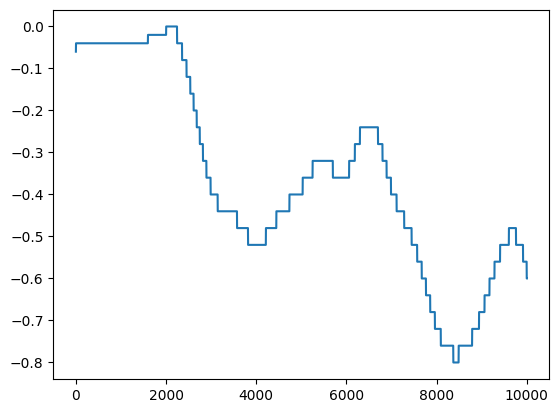

In [8]:
plt.plot(df['ProductionChange'])

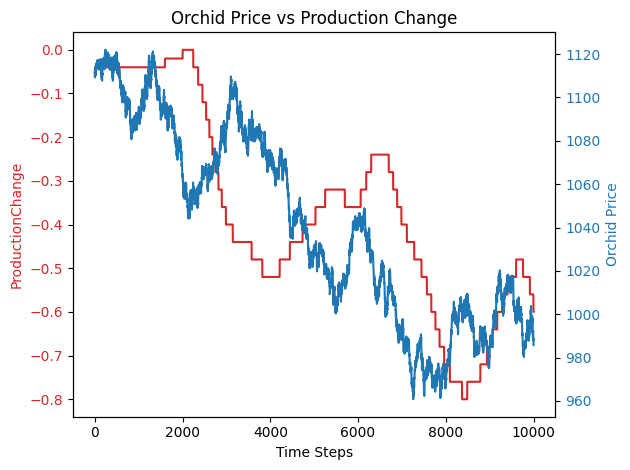

In [9]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('ProductionChange', color=color)
ax1.plot(df.index, df['ProductionChange'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis.
ax2 = ax1.twinx()

# Plot the second column 'B' on the new y-axis.
color = 'tab:blue'
ax2.set_ylabel('Orchid Price', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optionally, you can add titles or labels.
plt.title('Orchid Price vs Production Change')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped.

# Show the plot.
plt.show()


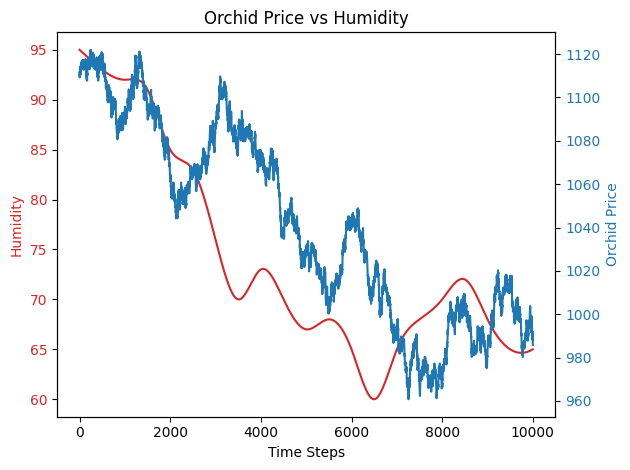

In [10]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Humidity', color=color)
ax1.plot(df.index, df['HUMIDITY'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis.
ax2 = ax1.twinx()

# Plot the second column 'B' on the new y-axis.
color = 'tab:blue'
ax2.set_ylabel('Orchid Price', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optionally, you can add titles or labels.
plt.title('Orchid Price vs Humidity')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped.

# Show the plot.
plt.show()


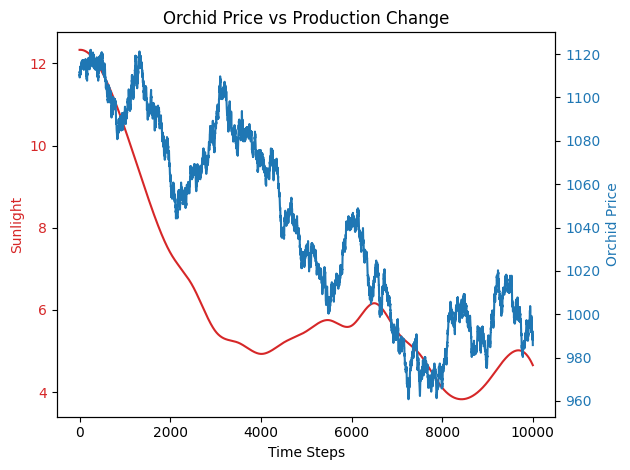

In [11]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Sunlight', color=color)
ax1.plot(df.index, df['SUNLIGHT'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis.
ax2 = ax1.twinx()

# Plot the second column 'B' on the new y-axis.
color = 'tab:blue'
ax2.set_ylabel('Orchid Price', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optionally, you can add titles or labels.
plt.title('Orchid Price vs Production Change')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped.

# Show the plot.
plt.show()


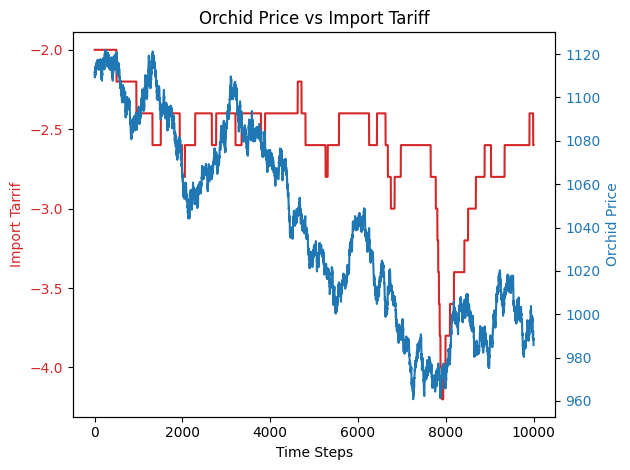

In [12]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Import Tarrif', color=color)
ax1.plot(df.index, df['IMPORT_TARIFF'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis.
ax2 = ax1.twinx()

# Plot the second column 'B' on the new y-axis.
color = 'tab:blue'
ax2.set_ylabel('Orchid Price', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optionally, you can add titles or labels.
plt.title('Orchid Price vs Import Tariff')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped.

# Show the plot.
plt.show()


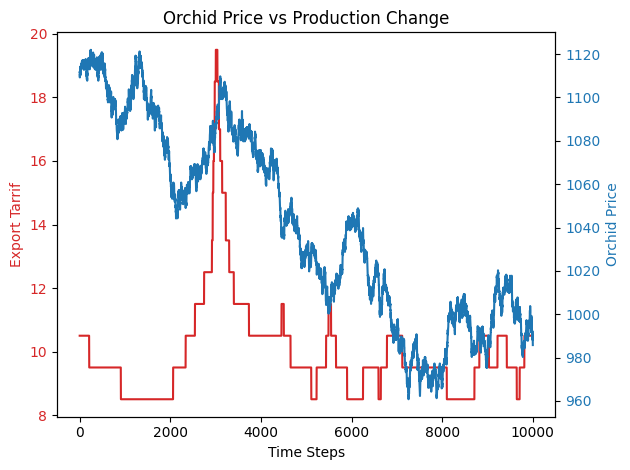

In [13]:
import matplotlib.pyplot as plt

# Assume 'df' is your DataFrame and it has two columns 'A' and 'B' you want to plot.

# Create the first figure and axis.
fig, ax1 = plt.subplots()

# Plot the first column 'A'.
color = 'tab:red'
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Export Tarrif', color=color)
ax1.plot(df.index, df['EXPORT_TARIFF'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis.
ax2 = ax1.twinx()

# Plot the second column 'B' on the new y-axis.
color = 'tab:blue'
ax2.set_ylabel('Orchid Price', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Optionally, you can add titles or labels.
plt.title('Orchid Price vs Production Change')
fig.tight_layout()  # To ensure the right y-label is not slightly clipped.

# Show the plot.
plt.show()


In [23]:
def period_pct_change(series, period):
    return np.log1p(series.pct_change(period)).shift(-period)

In [24]:
df['OrchidPctChg100'] = period_pct_change(df['ORCHIDS'], 100).shift(-100)
df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ProductionChange,OrchidPctChg100
0,0,1111.75,1.5,10.5,-2.0,12.328767,95.000000,0,-0.06,0.001792
1,100,1111.75,1.5,10.5,-2.0,12.328865,94.995990,0,-0.04,0.000000
2,200,1109.75,1.5,10.5,-2.0,12.328959,94.991980,0,-0.04,-0.000448
3,300,1109.25,1.5,10.5,-2.0,12.329045,94.987970,0,-0.04,-0.000448
4,400,1110.75,1.5,10.5,-2.0,12.329127,94.983950,0,-0.04,0.000224
...,...,...,...,...,...,...,...,...,...,...
9996,999600,988.25,1.3,10.5,-2.6,4.667318,64.989100,0,-0.56,NaN
9997,999700,988.00,1.3,10.5,-2.6,4.664886,64.991806,0,-0.60,NaN
9998,999800,988.75,1.3,10.5,-2.6,4.662445,64.994530,0,-0.60,NaN
9999,999900,986.75,1.3,10.5,-2.6,4.659995,64.997260,0,-0.60,NaN


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [19]:
regression_df = df.dropna()
per = 'OrchidPctChg100'
X = regression_df[['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES']]
y = regression_df[per]

KeyError: 'OrchidPctChg100'

In [ ]:
def run_regression(df, x_columns, y_column):
    # Split the data into 80% training and 20% testing
    X = df[x_columns]
    y = df[y_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Add a constant to the model (the intercept)
    X_train_sm = sm.add_constant(X_train)
    
    # Fit the regression model
    model = sm.OLS(y_train, X_train_sm).fit()
    
    # Return the summary of the model
    print(model.summary())

In [ ]:
for per in range(50, 500, 500):

    print(f'{per} PERIOD')
    run_regression(regression_df, ['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES'], f'OrchidPctChg{per}')

# XGBoost

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def run_xgboost_regression(df, x_columns, y_column):
    df = df.dropna()
    X = df[x_columns]
    y = df[y_column]
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the XGBoost regressor
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
    
    # Fit the regressor to the training set
    xg_reg.fit(X_train, y_train)
    
    # Predictions
    y_pred = xg_reg.predict(X_test)
    
    # Calculate scores
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print({'R-squared': r2, 'Mean Squared Error': mse})

    feature_importances = xg_reg.feature_importances_
    
    # Create a DataFrame for easy viewing
    importance_df = pd.DataFrame({
        'Feature': x_columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print(importance_df)
    return xg_reg

In [58]:
model = run_xgboost_regression(df, ['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES'], 'OrchidPctChg100')
model

{'R-squared': 0.6634807531386618, 'Mean Squared Error': 2.887258368566691e-05}
            Feature  Importance
2  ProductionChange    0.309531
3    TRANSPORT_FEES    0.251615
0     IMPORT_TARIFF    0.228431
1     EXPORT_TARIFF    0.210423


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
def run_xgboost_prediction(df, x_columns, y_column):
    df = df.dropna()
    X = df[x_columns]
    y = df[y_column]
    
    # Initialize and fit the XGBoost regressor
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
    xg_reg.fit(X, y)
    
    # Making predictions on the entire dataset
    y_pred = xg_reg.predict(X)
    
    # Return the actual and predicted values
    return pd.DataFrame({'Actual': y, 'Predicted': y_pred})

In [73]:
def run_xgboost_prediction_presaved(df, model, x_columns, y_column):
    df = df.dropna()
    X = df[x_columns]
    y = df[y_column]
    # Initialize and fit the XGBoost regressor
    y_pred = model.predict(X)
    
    # Return the actual and predicted values
    return pd.DataFrame({'Actual': y, 'Predicted': y_pred})

In [45]:
results_df = run_xgboost_prediction(df, ['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES'], 'OrchidPctChg100')

In [101]:
def model_compare(original_df, results_df):
    actual = results_df['Actual']
    predicted = results_df['Predicted']
    
    plt.figure(figsize=(10, 6))
    plt.plot(results_df.index, actual, label='Actual')
    plt.plot(results_df.index, predicted, label='Predicted', alpha=0.7, color='red')
    plt.legend()
    plt.title('Comparison of Actual and Predicted Returns')
    plt.xlabel('Index')
    plt.ylabel('Y Value')
    plt.show()

    original_df['pred_ret'] = results_df['Predicted']
    original_df['ORCHID_PRED'] = (original_df['ORCHIDS'] * np.exp(original_df['pred_ret']))
    original_df['ORCHID_PRED'] = original_df['ORCHID_PRED'].shift(100)
    temp_df = original_df.dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(temp_df.index, temp_df['ORCHIDS'], label='Actual')
    plt.plot(temp_df.index, temp_df['ORCHID_PRED'], label='Predicted', alpha=0.7, color='red')
    plt.legend()
    plt.title('Comparison of Actual and Predicted Prices')
    plt.xlabel('Index')
    plt.ylabel('Y Value')
    plt.show()
    return temp_df

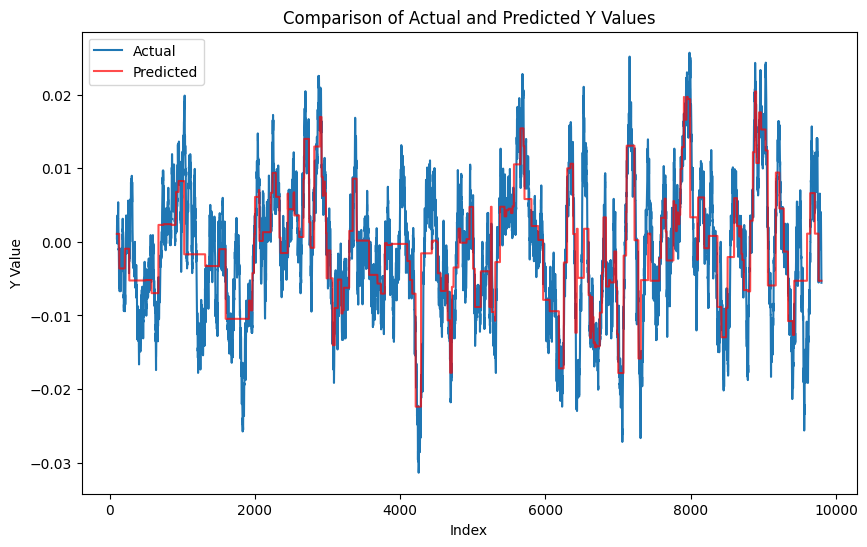

In [46]:
# Using the results DataFrame from the XGBoost function
actual = results_df['Actual']
predicted = results_df['Predicted']

plt.figure(figsize=(10, 6))
plt.plot(actual.index, actual, label='Actual')
plt.plot(predicted.index, predicted, label='Predicted', alpha=0.7, color='red')
plt.legend()
plt.title('Comparison of Actual and Predicted Y Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
plt.show()


In [47]:
df['pred_ret'] = results_df['Predicted']
df['ORCHID_PRED'] = (df['ORCHIDS'] * np.exp(df['pred_ret'])).shift(100)


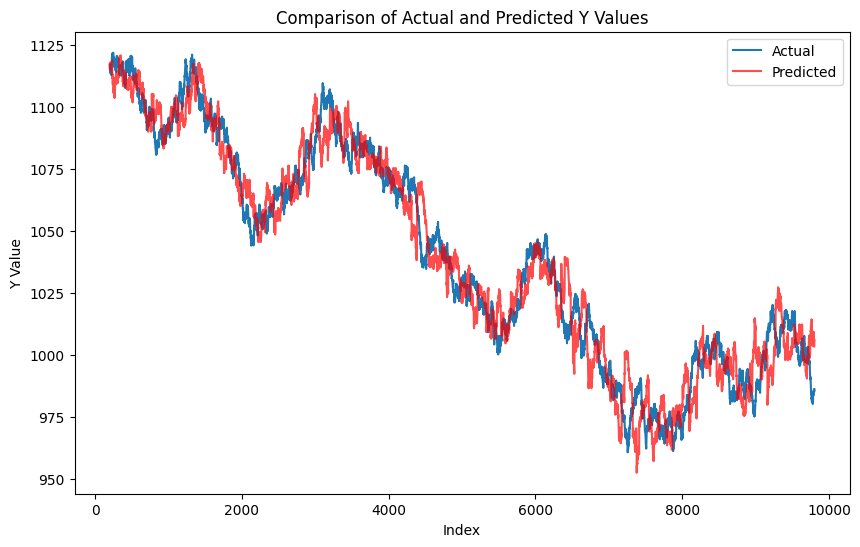

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(temp_df.index, temp_df['ORCHIDS'], label='Actual')
plt.plot(temp_df.index, temp_df['ORCHID_PRED'], label='Predicted', alpha=0.7, color='red')
plt.legend()
plt.title('Comparison of Actual and Predicted Y Values')
plt.xlabel('Index')
plt.ylabel('Y Value')
plt.show()

In [91]:
newday_df = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
newday_df['SUNLIGHT'] /= 365
newday_df['ProductionChange'] = newday_df.apply(lambda x: total_production_change(x['HUMIDITY'], x['SUNLIGHT']), axis=1)
newday_df['OrchidPctChg100'] = period_pct_change(newday_df['ORCHIDS'], 100)
newday_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ProductionChange,OrchidPctChg100
0,0,1200.00,1.5,10.5,-2.0,6.849315,79.000000,-1,-0.04,-0.001042
1,100,1201.75,1.5,9.5,-2.0,6.847725,79.004100,-1,-0.04,-0.002917
2,200,1201.75,1.5,9.5,-2.0,6.846153,79.008210,-1,-0.04,-0.002708
3,300,1201.75,1.5,9.5,-2.0,6.844597,79.012340,-1,-0.04,-0.001666
4,400,1201.75,1.5,9.5,-2.0,6.843059,79.016490,-1,-0.04,-0.000832
...,...,...,...,...,...,...,...,...,...,...
9996,999600,1227.75,1.4,8.5,-3.0,10.690282,83.025764,-1,0.00,NaN
9997,999700,1226.75,1.4,8.5,-3.0,10.688935,83.019300,-1,0.00,NaN
9998,999800,1227.75,1.4,8.5,-3.0,10.687595,83.012856,-1,0.00,NaN
9999,999900,1228.00,1.4,8.5,-3.0,10.686260,83.006424,-1,0.00,NaN


In [102]:
newday_results = run_xgboost_prediction_presaved(newday_df, model,['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES'], 'OrchidPctChg100')
newday_results

,Actual,Predicted
100,0.007066,-0.007235
101,0.008311,-0.007235
102,0.008516,-0.007235
103,0.007887,-0.006461
104,0.006227,-0.006461
...,...,...
9896,0.002446,0.006496
9897,0.001428,0.006496
9898,0.002855,0.006496
9899,0.001834,0.006496


In [103]:
newday_results['Real orchids'] = (newday_df['ORCHIDS']*np.exp(newday_df['OrchidPctChg100'])).shift(100)
newday_df['ORCHIDS'].iloc[100:105] == newday_results['Real orchids'].iloc[100:105]
newday_df['ORCHIDS'].iloc[100:105], newday_results['ORCHID_PRED'].iloc[100:105]

ValueError: Can only compare identically-labeled Series objects

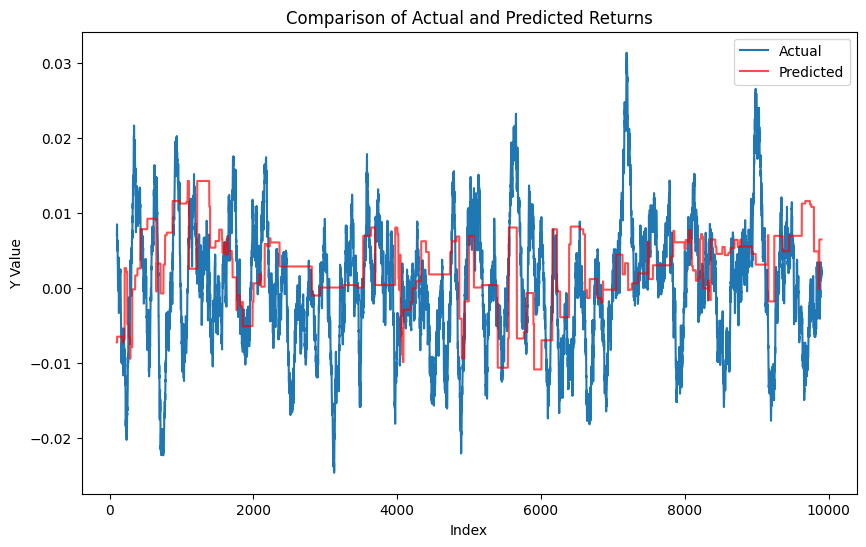

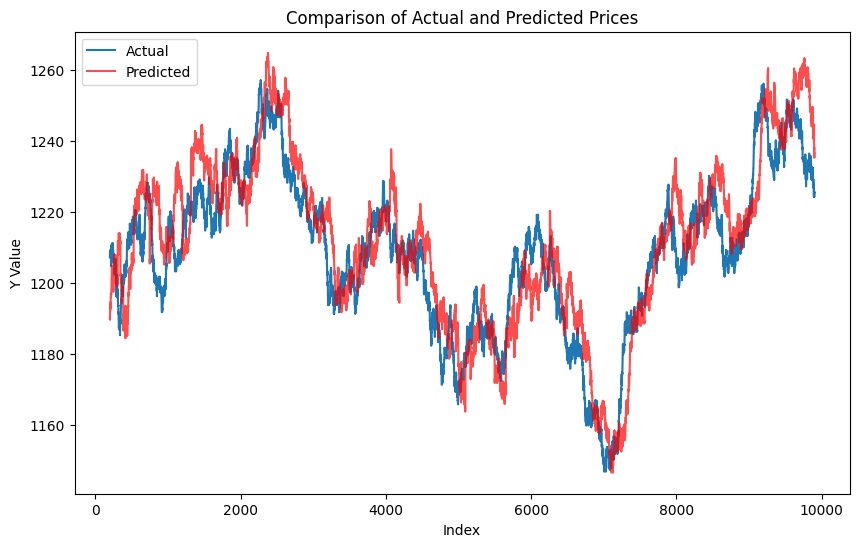

In [104]:
model_df = model_compare(newday_df, newday_results)

model_df

In [105]:
model_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ProductionChange,OrchidPctChg100,pred_ret,ORCHID_PRED
200,20000,1207.25,1.4,9.5,-2.2,6.840526,80.176020,-1,-0.04,-0.005399,-0.006814,1190.107922
201,20100,1208.25,1.4,9.5,-2.2,6.841870,80.183550,-1,-0.04,-0.007477,-0.006814,1189.611527
202,20200,1208.75,1.4,9.5,-2.2,6.843227,80.191090,-1,-0.04,-0.008307,-0.006814,1189.859724
203,20300,1209.25,1.4,9.5,-2.2,6.844597,80.198654,-1,-0.04,-0.010391,-0.006814,1192.023772
204,20400,1208.25,1.4,9.5,-2.2,6.845977,80.206230,-1,-0.04,-0.008728,-0.006814,1193.017333
...,...,...,...,...,...,...,...,...,...,...,...,...
9896,989600,1224.75,1.5,8.5,-2.8,10.853599,83.732090,-1,0.00,0.002446,0.006496,1237.297483
9897,989700,1225.00,1.5,8.5,-2.8,10.851713,83.724510,-1,0.00,0.001428,0.006496,1238.302394
9898,989800,1224.25,1.5,8.5,-2.8,10.849832,83.716934,-1,0.00,0.002855,0.006496,1237.297483
9899,989900,1225.75,1.5,8.5,-2.8,10.847955,83.709370,-1,0.00,0.001834,0.006496,1235.287659


# Optimal lag in case

In [ ]:
def optimal_lag(df, x_columns):

    models = {}
    
    for per in range(50, 500, 50):
        
        y = f'OrchidPctChg{per}'
    
        def run_xgboost_regression(df, x_columns, y_column):
            '''
            Returns the XGBoost model itself
            '''
            df = df.dropna()
            X = df[x_columns]
            y = df[y_column]
            
            # Splitting the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            # Initialize the XGBoost regressor
            xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
            
            # Fit the regressor to the training set
            xg_reg.fit(X_train, y_train)
            
            # Predictions
            y_pred = xg_reg.predict(X_test)
            
            # Calculate scores
            r2 = r2_score(y_test, y_pred)

            return {'Model': xg_reg, 'R2': r2}
            
        models[per] = run_xgboost_regression(df, x_columns, y)
transform_df(df1)
optimal_lag(df1, ['IMPORT_TARIFF', 'EXPORT_TARIFF', 'ProductionChange', 'TRANSPORT_FEES'])